In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os
from Utils.Read_data import *

c:\Users\anisr\anaconda3\envs\work\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\anisr\anaconda3\envs\work\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\anisr\anaconda3\envs\work\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
path = "DataPaper/"
users = os.listdir(path)

In [3]:
df_rr = create_dataset(users,'RR')

NO data for actigraph_expanded.csv
NO data for actigraph_intervals.csv
NO data for actigraph_labelled.csv


In [4]:
df_rr

,ibi_s,day,time,user
0,0.258,1,10:10:17,user_1
1,0.319,1,10:10:18,user_1
2,0.266,1,10:10:18,user_1
3,0.401,1,10:10:18,user_1
4,1.089,1,10:10:19,user_1
...,...,...,...,...
75245,0.686,-29,09:24:19,user_9
75246,0.673,-29,09:24:20,user_9
75247,0.664,-29,09:24:20,user_9
75248,0.667,-29,09:24:21,user_9


In [5]:
df_rr[df_rr['user'] =='user_17']

,ibi_s,day,time,user
0,3.895,1,09:26:08,user_17
1,0.256,1,09:26:08,user_17
2,0.271,1,09:26:08,user_17
3,0.292,1,09:26:09,user_17
4,0.269,1,09:26:09,user_17
...,...,...,...,...
92946,0.329,2,10:56:24,user_17
92947,0.602,2,10:56:24,user_17
92948,0.397,2,10:56:25,user_17
92949,0.401,2,10:56:25,user_17


In [6]:
df_rr['timestamp'] = [float(x.split(':')[0])*60*60 + float(x.split(':')[1])*60 + float(x.split(':')[2]) if y == 1 else
                      float(x.split(':')[0])*60*60 + float(x.split(':')
                                                           [1])*60 + float(x.split(':')[2]) + 24*60*60
                      for x, y in zip(df_rr['time'], df_rr['day'])]

df_rr['ibi_s'] = [x if x < 2 else np.nan for x in df_rr['ibi_s']]
df_rr['ibi_s'] = [x if x > 0.3 else np.nan for x in df_rr['ibi_s']]

df_rr['hr'] = [60/x for x in df_rr['ibi_s']]

In [7]:
df_rr

,ibi_s,day,time,user,timestamp,hr
0,NaN,1,10:10:17,user_1,36617.0,NaN
1,0.319,1,10:10:18,user_1,36618.0,188.087774
2,NaN,1,10:10:18,user_1,36618.0,NaN
3,0.401,1,10:10:18,user_1,36618.0,149.625935
4,1.089,1,10:10:19,user_1,36619.0,55.096419
...,...,...,...,...,...,...
75245,0.686,-29,09:24:19,user_9,120259.0,87.463557
75246,0.673,-29,09:24:20,user_9,120260.0,89.153046
75247,0.664,-29,09:24:20,user_9,120260.0,90.361446
75248,0.667,-29,09:24:21,user_9,120261.0,89.955022


In [8]:
df_user_example = df_rr[(df_rr['user'] == 'user_17') & (df_rr['day']==1)].dropna()

In [9]:
df_user_example['time'] = pd.to_datetime(
    df_user_example['time'], format='%H:%M:%S').dt.strftime('%I:%M:%S %p')

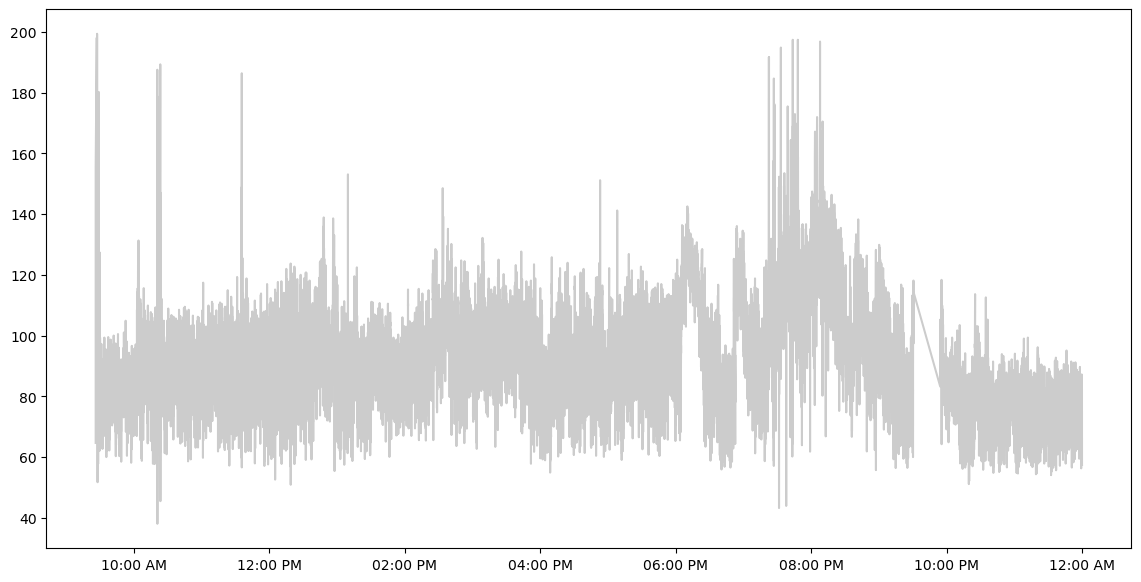

In [10]:
df_user_example['time'] = pd.to_datetime(df_user_example['time'], format='%I:%M:%S %p')
plt.figure(figsize=(14, 7))

plt.plot(df_user_example['time'], df_user_example['hr'],
         label='Heart Rate', color='black', alpha=0.2)

plt.gca().xaxis.set_major_formatter(
    plt.matplotlib.dates.DateFormatter('%I:%M %p'))

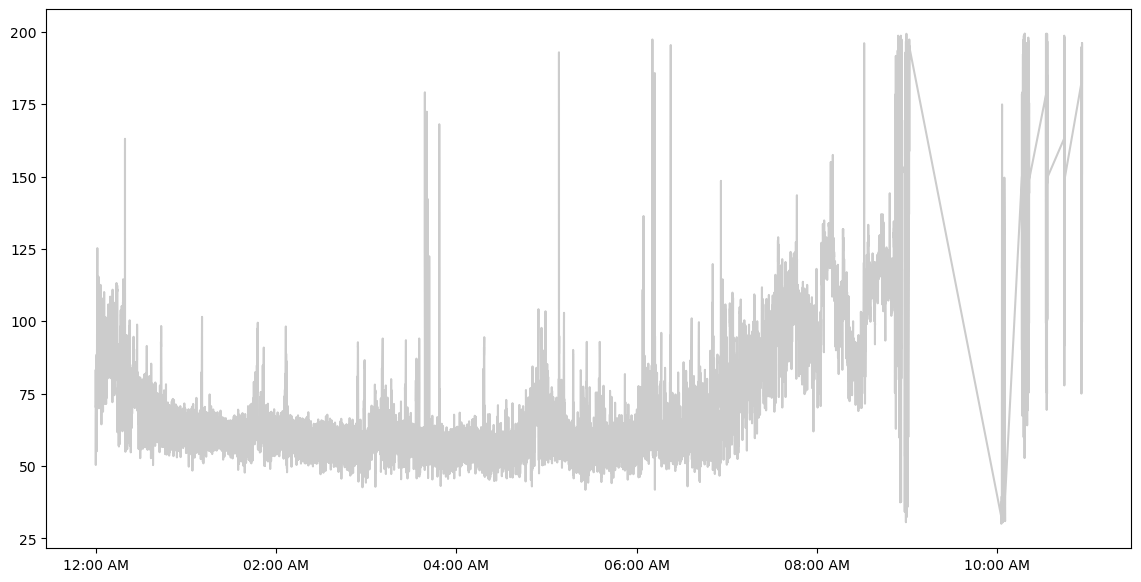

In [11]:
df_user_example1 = df_rr[(df_rr['user'] == 'user_17') & (df_rr['day'] == 2)].dropna()
df_user_example1['time'] = pd.to_datetime(
    df_user_example1['time'], format='%H:%M:%S').dt.strftime('%I:%M:%S %p')
df_user_example1['time'] = pd.to_datetime(
    df_user_example1['time'], format='%I:%M:%S %p')
plt.figure(figsize=(14, 7))

plt.plot(df_user_example1['time'], df_user_example1['hr'],
         label='Heart Rate', color='black', alpha=0.2)

plt.gca().xaxis.set_major_formatter(
    plt.matplotlib.dates.DateFormatter('%I:%M %p'))

In [12]:
Actigraphy_labelled = pd.read_csv('DataPaper/actigraph_intervals.csv')

In [13]:
Actigraphy_labelled['start_time'] = pd.to_datetime(
    Actigraphy_labelled['start_time'], format='%H:%M:%S')
Actigraphy_labelled['end_time'] = pd.to_datetime(
    Actigraphy_labelled['end_time'], format='%H:%M:%S')

df_rr['time'] = pd.to_datetime(df_rr['time'], format='%H:%M:%S')

activities = []
for i, row in df_rr.iterrows():
    activity = Actigraphy_labelled[(Actigraphy_labelled['start_time'] <= row['time']) & (
        Actigraphy_labelled['end_time'] >= row['time'])]
    if not activity.empty:
        activities.append(activity.iloc[0]['Activity'])
    else:
        activities.append(np.nan)

df_rr['Activity'] = activities


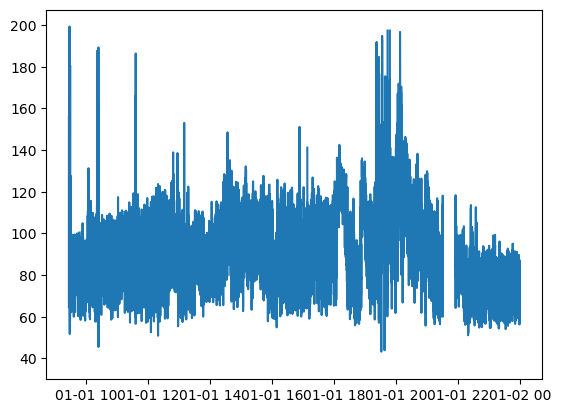

In [14]:
plt.plot(df_rr[(df_rr['user'] == 'user_17') & (df_rr['day'] == 1)]['time'], df_rr[(df_rr['user'] == 'user_17') & (df_rr['day'] == 1)]['hr'])

In [16]:
df_rr.to_csv('DataPaper/activity_rr.csv', index=False)